<table style="float:left; border:none">
   <tr style="border:none">
       <td style="border:none">  
           <img 
               src="assets/dh.png" 
               style="width:500px"
           >
           </a>    
       </td>
   </tr>
</table>
<div style="float:right;"><h2>01. Exploratory Data Analisis</h2></div>

<a id="top"></a> <br>
## Índice
1. [Presentación del problema](#1)<br>
2. [Carga de paquetes y datos](#2)<br>
    2.1. [Librerías y clases](#21)<br>
    2.2. [Lectura de datos](#22)<br>
3. [Analisis exploratorio de datos](#3)<br>
    3.1. [Primer aproximamiento a los datos](#31)<br>
    3.2. [Analisis de valores nulos](#32)<br>
    3.3. [Análisis de variable target](#33)<br>
    3.4. [Análisis de variable City](#34)<br>
    3.5. [Análisis de variable City Development Index](#35)<br>
    3.6. [Análisis de variable Education Level](#36)<br>
    3.7. [Análisis de variable Company Type y Company Size](#37)<br>
    3.8. [Análisis de variable Training hours](#38)<br>

***
<a id="1"></a> <br>
## 1. Presentación del problema

<font size = 3> 
Una empresa que desarrolla sus actividades en el campo de Big Data y Data Science. La compañía desempeña sus actividades en dos ramas; brinda consultoría privada y ofrece cursos de capacitación. 
La empresa desea contratar data scientist entre personas que aprobaron cursos que ellos mismos dictan. La compañía quiere saber cuáles de los candidatos realmente desea cambiar de trabajo luego del entrenamiento porque ayuda a reducir los costos y el tiempo de la selección de personal, así como la calidad de la formación o planificación de los cursos y categorización de los candidatos.
El objetivo es comprender las variables demográficas que pueden conducir a un cambio de trabajo y predecir si un empleado está buscando un cambio de trabajo.


***
<a id="2"></a> <br>
## 2. Carga de paquetes y datos

<a id="21"></a>
### 2.1. Librerías y clases

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

C:\Users\gtoso\anaconda3\envs\dhproyect\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id="22"></a>
### 2.2. Lectura de datos

In [2]:
# Carga de dataset
df = pd.read_csv("../archive/aug.csv")
df.sample(4)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
11524,11725,city_104,0.924,NaN,Has relevent experience,Full time course,Graduate,STEM,11,50-99,Pvt Ltd,4,10,0.0
4934,3886,city_160,0.920,Male,No relevent experience,Full time course,High School,NaN,5,NaN,Pvt Ltd,never,212,0.0
14088,15840,city_103,0.920,NaN,No relevent experience,no_enrollment,NaN,NaN,6,NaN,NaN,never,8,0.0
15327,31753,city_21,0.624,Male,No relevent experience,no_enrollment,Graduate,STEM,2,<10,Pvt Ltd,2,34,1.0


***
<a id="3"></a> <br>
## 3. Analisis exploratorio de datos

<a id="31"></a>
### 3.1. Primer aproximamiento a los datos

In [3]:
# Se genera un reporte con pandas profiling
data_report = ProfileReport(df)
data_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
display(df.describe(), df.describe(include='object'))

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [6]:
# Visualización de unique sample de cada variable
pd.set_option('display.max_colwidth', -1)
# dataframe con valores unicos de las columnas
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].dtype, df[col].nunique(), df[col].unique()])

tabel_unique = pd.DataFrame(columns=['Column Name', "dtype",'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel_unique

,Column Name,dtype,Number of Unique,Unique Sample
0,enrollee_id,int64,19158,"[8949, 29725, 11561, 33241, 666, 21651, 28806, 402, 27107, 699, 29452, 23853, 25619, 5826, 8722, 6588, 4167, 5764, 2156, 11399, 31972, 19061, 6491, 7041, 22767, 14505, 17139, 28476, 21538, 10408, 14928, 22293, 4324, 26966, 26494, 4866, 12726, 10164, 8612, 24659, 2547, 13854, 31654, 13643, 5590, 22452, 9006, 25987, 4476, 25103, 5568, 2195, 30533, 28512, 1023, 12253, 25296, 13238, 13478, 18578, 29975, 26516, 24690, 8433, 9572, 5878, 25695, 9645, 12730, 4830, 20970, 17271, 12731, 10908, 29117, 3686, 22683, 22134, 31765, 31449, 5987, 21762, 22070, 25413, 5902, 28403, 30937, 28751, 29290, 32401, 19128, 29036, 16869, 10497, 18099, 12081, 7364, 11184, 7016, 8695, ...]"
1,city,object,123,"[city_103, city_40, city_21, city_115, city_162, city_176, city_160, city_46, city_61, city_114, city_13, city_159, city_102, city_67, city_100, city_16, city_71, city_104, city_64, city_101, city_83, city_105, city_73, city_75, city_41, city_11, city_93, city_90, city_36, city_20, city_57, city_152, city_19, city_65, city_74, city_173, city_136, city_98, city_97, city_50, city_138, city_82, city_157, city_89, city_150, city_70, city_175, city_94, city_28, city_59, city_165, city_145, city_142, city_26, city_12, city_37, city_43, city_116, city_23, city_99, city_149, city_10, city_45, city_80, city_128, city_158, city_123, city_7, city_72, city_106, city_143, city_78, city_109, city_24, city_134, city_48, city_144, city_91, city_146, city_133, city_126, city_118, city_9, city_167, city_27, city_84, city_54, city_39, city_79, city_76, city_77, city_81, city_131, city_44, city_117, city_155, city_33, city_141, city_127, city_62, ...]"
2,city_development_index,float64,93,"[0.92, 0.7759999999999999, 0.624, 0.789, 0.767, 0.764, 0.762, 0.913, 0.926, 0.8270000000000001, 0.843, 0.804, 0.855, 0.887, 0.91, 0.884, 0.924, 0.6659999999999999, 0.5579999999999999, 0.923, 0.794, 0.754, 0.939, 0.55, 0.865, 0.698, 0.893, 0.7959999999999999, 0.866, 0.682, 0.802, 0.579, 0.878, 0.897, 0.949, 0.925, 0.8959999999999999, 0.836, 0.693, 0.769, 0.775, 0.903, 0.555, 0.727, 0.64, 0.516, 0.743, 0.899, 0.915, 0.6890000000000001, 0.895, 0.89, 0.847, 0.527, 0.7659999999999999, 0.738, 0.647, 0.795, 0.74, 0.701, 0.493, 0.84, 0.691, 0.735, 0.742, 0.479, 0.722, 0.921, 0.848, 0.856, 0.898, 0.83, 0.73, 0.68, 0.725, 0.556, 0.4479999999999999, 0.763, 0.745, 0.645, 0.7879999999999999, 0.78, 0.512, 0.7390000000000001, 0.563, 0.518, 0.8240000000000001, 0.487, 0.649, 0.7809999999999999, 0.625, 0.807, 0.664]"
3,gender,object,3,"[Male, nan, Female, Other]"
4,relevent_experience,object,2,"[Has relevent experience, No relevent experience]"
5,enrolled_university,object,3,"[no_enrollment, Full time course, nan, Part time course]"
6,education_level,object,5,"[Graduate, Masters, High School, nan, Phd, Primary School]"
7,major_discipline,object,6,"[STEM, Business Degree, nan, Arts, Humanities, No Major, Other]"
8,experience,object,22,"[>20, 15, 5, <1, 11, 13, 7, 17, 2, 16, 1, 4, 10, 14, 18, 19, 12, 3, 6, 9, 8, 20, nan]"
9,company_size,object,8,"[nan, 50-99, <10, 10000+, 5000-9999, 1000-4999, 10/49, 100-500, 500-999]"


<a id="32"></a>
### 3.2. Análisis de valores nulos

In [7]:
# Valores nulos por columnas y discriminado por variable target

num_null = {}
no_null = {}
si_null = {}

percent_null = {}
percent_no_null = {}
percent_si_null = {}

nul_list = []
nul_no_list = []
nul_si_list = []

num = df.shape[0]
for col in df.columns.tolist():
    col_null = df[col].isnull().sum()
    col_no_null = df[df.target == 0][col].isnull().sum()
    col_yes_null = df[df.target == 1][col].isnull().sum()
    if col_null > 0:
        num_null[col] = col_null
        percent_null[col] = round(col_null/num,2)
        nul_list.append(col)
    if col_no_null > 0:
        no_null[col] = col_no_null
        percent_no_null[col] = round(col_no_null/num,2)
        nul_no_list.append(col)    
    if col_yes_null > 0:
        si_null[col] = col_yes_null
        percent_si_null[col] = round(col_yes_null/num,2)
        nul_si_list.append(col)
        
num_ = pd.Series(num_null)
num_no = pd.Series(no_null)
num_si = pd.Series(si_null)
per_ = pd.Series(percent_null)
per_no = pd.Series(percent_no_null)
per_si = pd.Series(percent_si_null)
con = pd.concat([num_,num_no,num_si,per_,per_no,per_si],axis=1).rename(columns={0:"Tot_nul",1:"Cant_nul 0",2:"Cant_nul 1", 3:"Porcent_nul", 4:"Porcent_nul 0", 5:"Porcent_nul 1"})

cm = sns.light_palette("#348498", as_cmap=True)
print("{} columnas tienen valores nulos.".format(df.isnull().any().sum()))
print("--------------------------------------")
con.style.background_gradient(cmap=cm,subset=con.columns.tolist())

8 columnas tienen valores nulos.
--------------------------------------


,Tot_nul,Cant_nul 0,Cant_nul 1,Porcent_nul,Porcent_nul 0,Porcent_nul 1
gender,4508,3119,1389,0.240000,0.160000,0.070000
enrolled_university,386,263,123,0.020000,0.010000,0.010000
education_level,460,356,104,0.020000,0.020000,0.010000
major_discipline,2813,2264,549,0.150000,0.120000,0.030000
experience,65,42,23,0.000000,0.000000,0.000000
company_size,5938,3528,2410,0.310000,0.180000,0.130000
company_type,6140,3756,2384,0.320000,0.200000,0.120000
last_new_job,423,269,154,0.020000,0.010000,0.010000


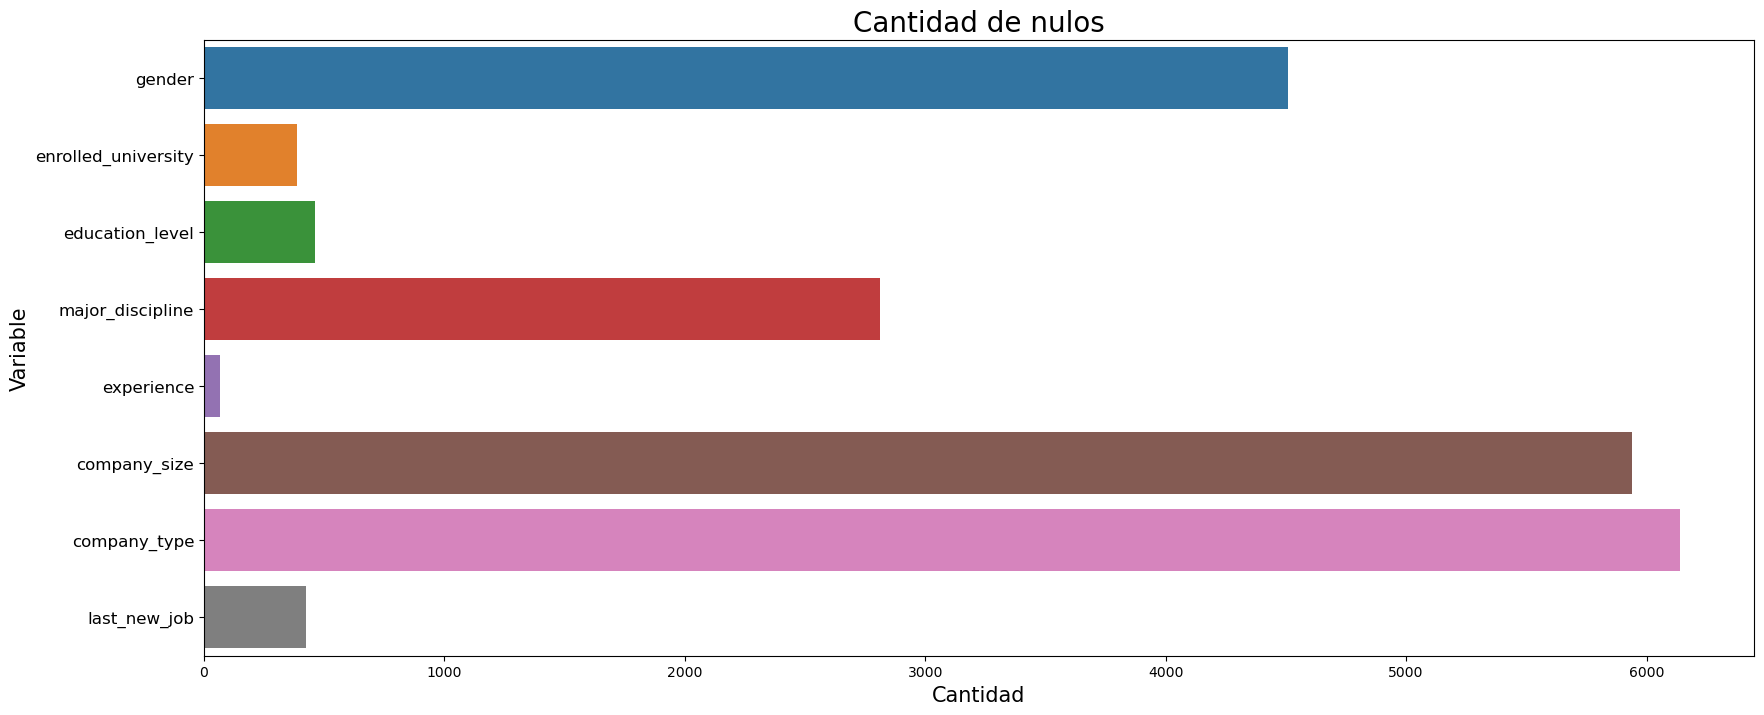

In [8]:
# Gráfico cantidad de nulos

f, ax = plt.subplots(figsize=(20, 8))
ax = sns.barplot(x = con.Tot_nul, y = con.index, data=con)
ax.set_title("Cantidad de nulos",fontsize=20)
ax.set_yticklabels(con.index, fontsize=12)
ax.set_xlabel("Cantidad",fontsize=15)
ax.set_ylabel("Variable",fontsize=15)
plt.show()

**Conclusiones**
1. La variable company_type es la que mayor cantidad de valores nulos tiene con 32%, seguida por company_size y luego gender
2. Del total de variables, solamente 8 contienen valores nulos
3. La variable target no tiene valores nulos

<a id="33"></a>
### 3.3. Análisis de variable target

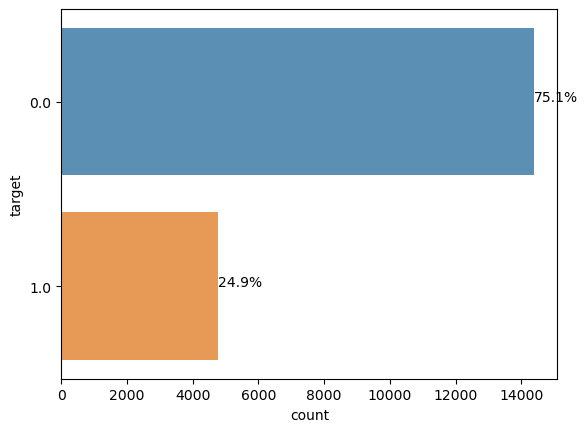

In [9]:
# Gráfico conteo total de variable target

ax = sns.countplot(y="target", data=df, alpha=0.8)
total = df.shape[0]

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

plt.show()

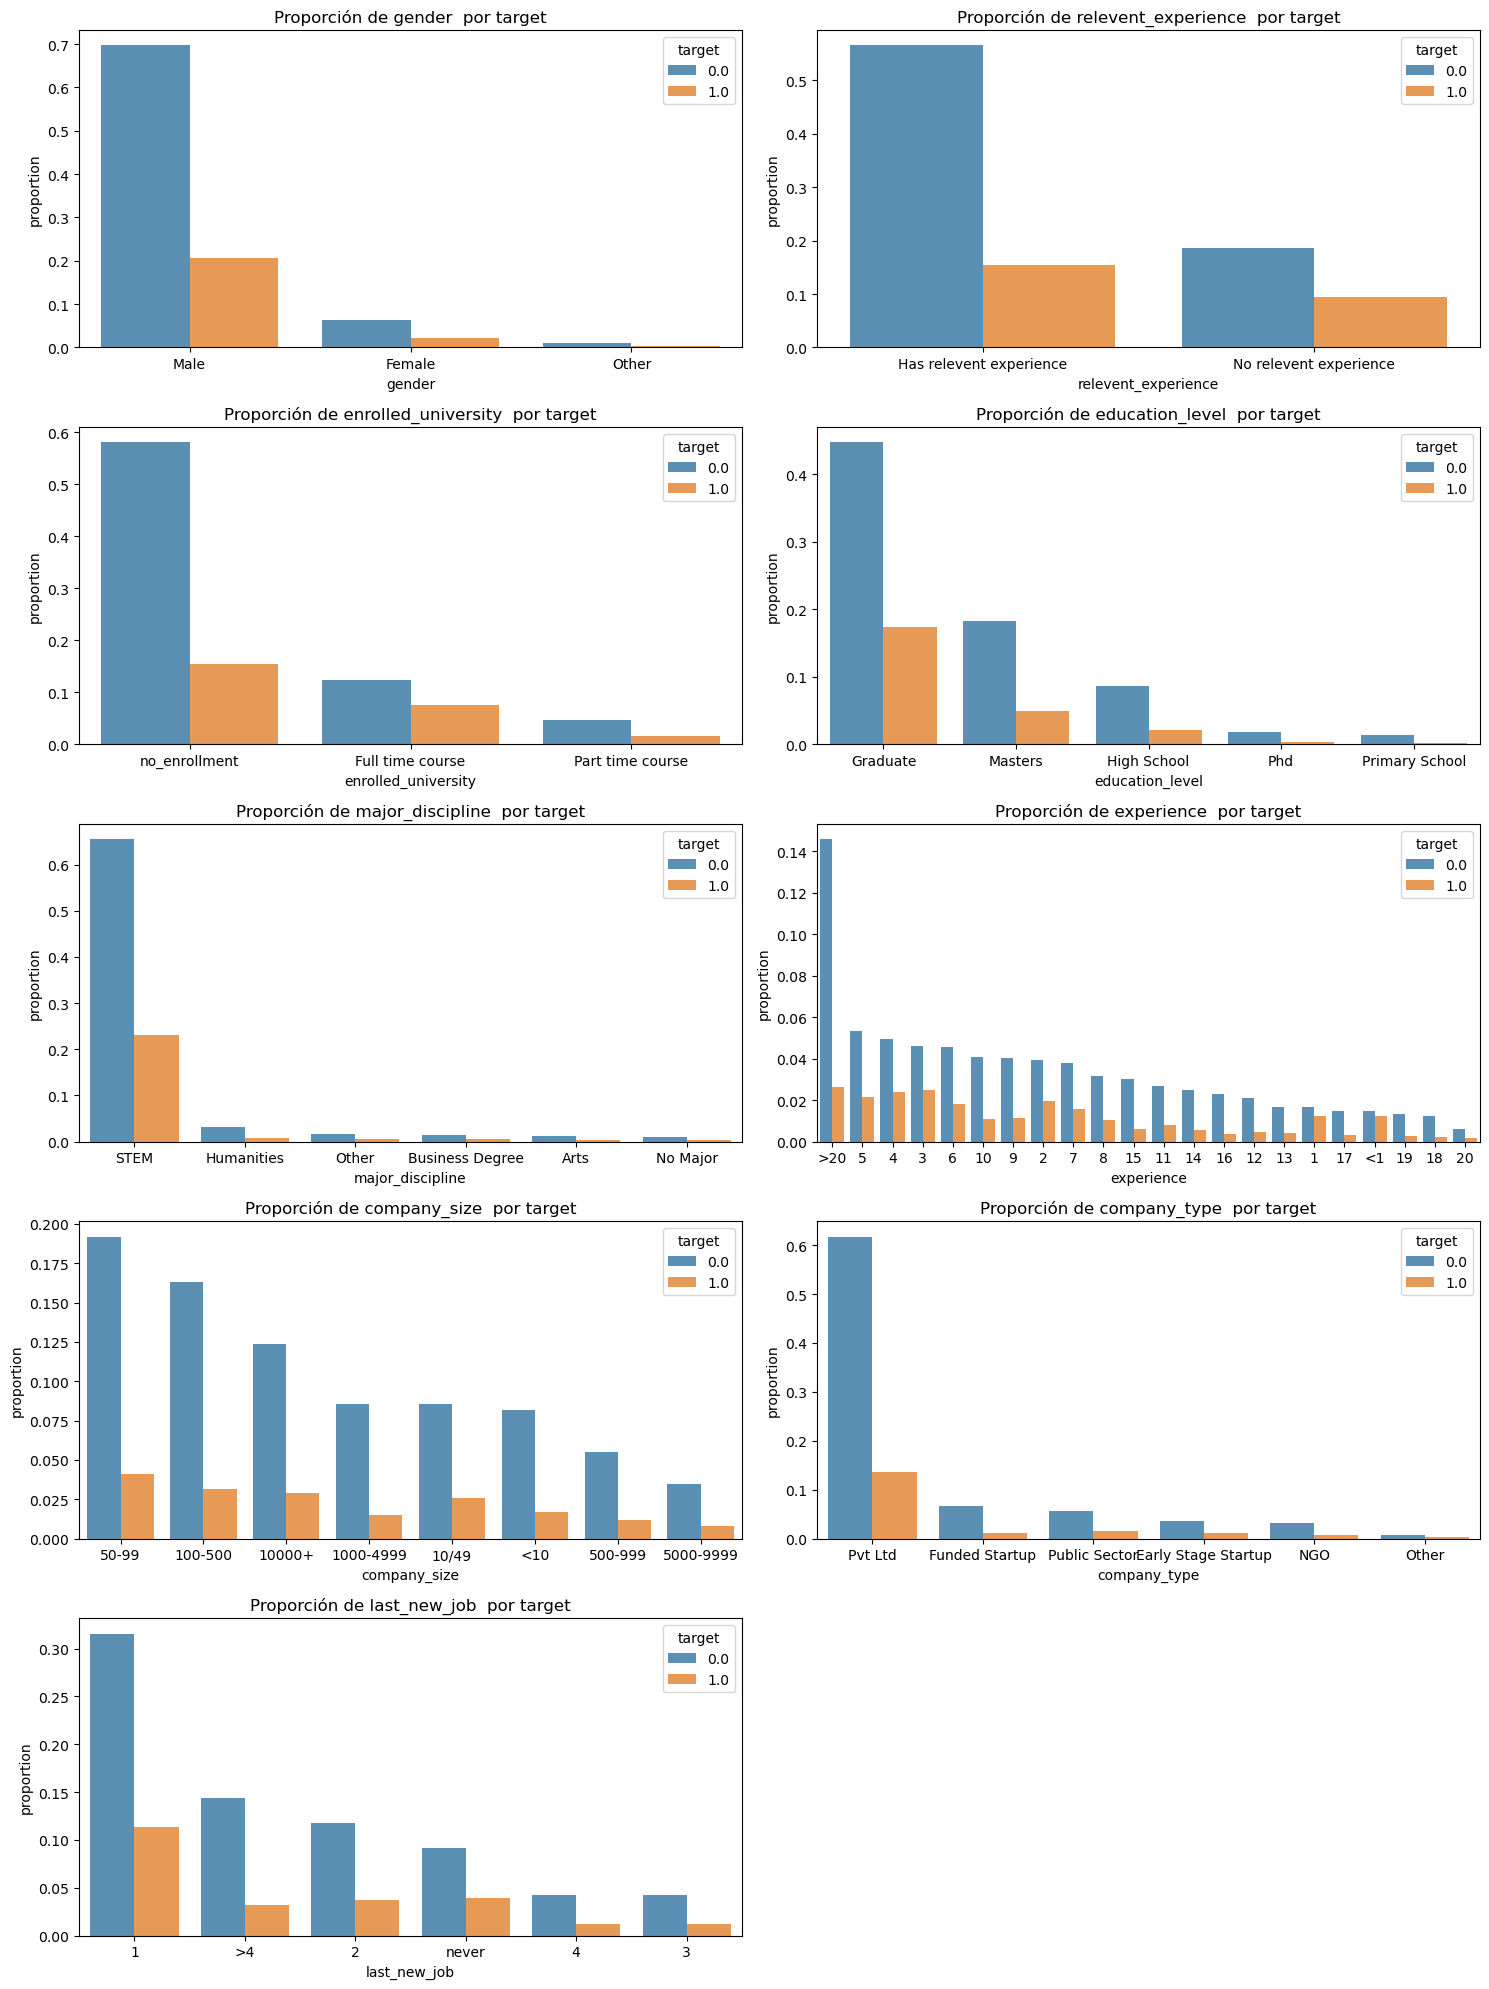

In [10]:
# Gráfico variable target discriminado por variables categóricas

cols_obj = list(df.dtypes[df.dtypes == object].index[1:])

plt.figure(figsize=[15, 20])

i = 1
y, hue = "proportion", "target"

for f in cols_obj:
    plt.subplot(5, 2, i)
    df[[f, 'target']]\
        .value_counts(normalize=True)\
        .rename(y)\
        .reset_index()\
        .pipe((sns.barplot, "data"), x=f, y='proportion', hue='target', alpha=0.8)
    plt.title("Proporción de {}  por target".format(f))
    i += 1
plt.tight_layout()
plt.show()

**Conclusiones**
1. El 75% de los candidatos decide no cambiar de trabajo.
2. Cuando se discrimina la variable enrolled_university por el target, se observa que aumenta la proporcion de candidatos que desean cambiar de trabajo si estan en la categoria full_time_curse.
3. La proporcion de candidatos que no desean cambiar de trabajo es mucho mayor entre los que tienen mas de 20 años de experiencia laboral

<a id="34"></a>
### 3.4. Análisis de variable City

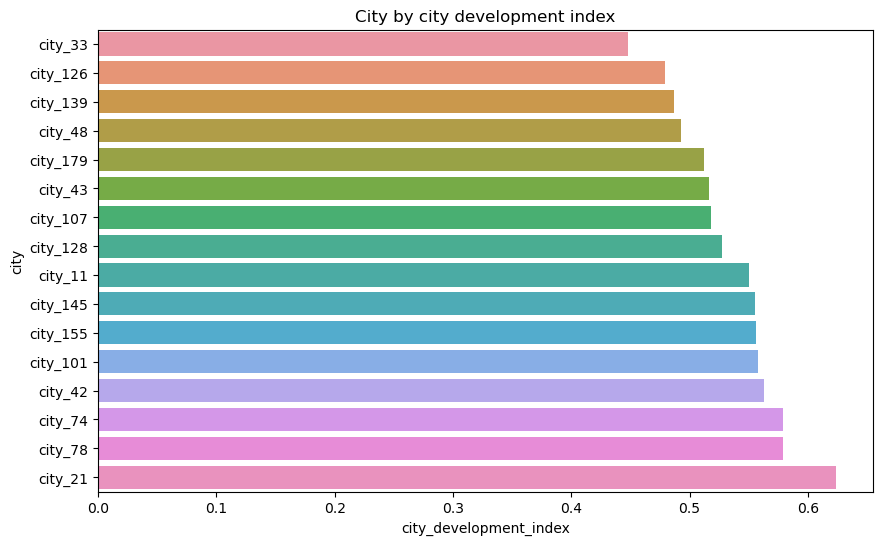

In [11]:
# Ciudades con el city development index más alto
cdi = df.sort_values(by='city_development_index', ascending=True)[:3000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=cdi.city, x=cdi.city_development_index)
plt.xticks()
plt.xlabel('city_development_index')
plt.ylabel('city')
plt.title('City by city development index')
plt.show()

<a id="35"></a>
### 3.5. Análisis de variable City Development Index

<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

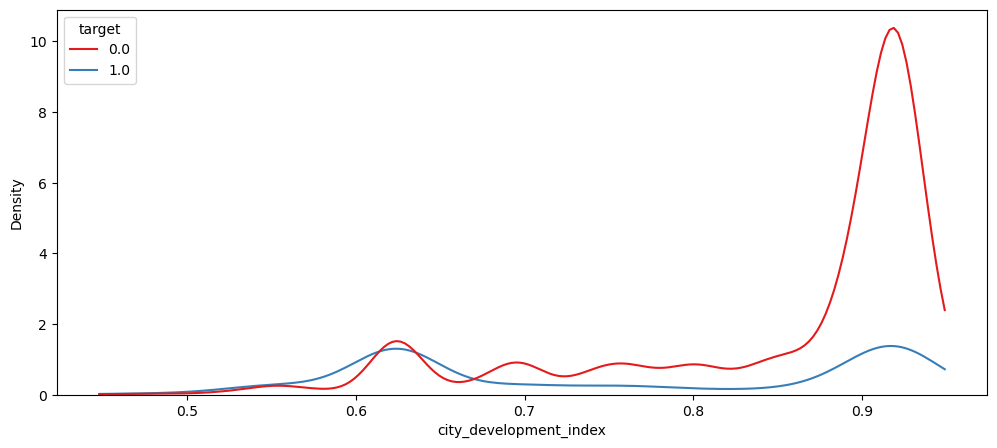

In [12]:
# City development index discriminado por target

plt.figure(figsize=(12, 5))
sns.kdeplot(data=df, x="city_development_index", hue="target",cut = 0,palette='Set1')

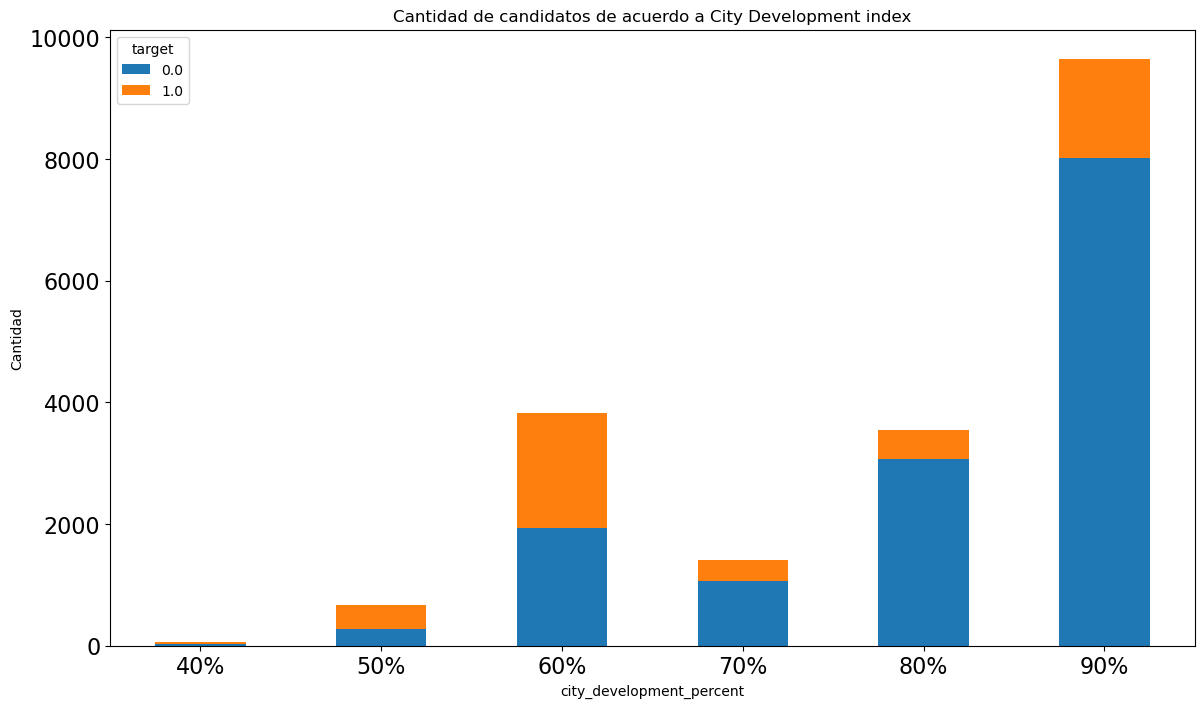

In [13]:
# Cantidad de candicatos de acuerdo a city development index

labels = ['40%', '50%', '60%', '70%', '80%', '90%']
bins = [0.400, 0.500, 0.600, 0.700, 0.800, 0.900, 1.000]

df["city_development_percent"] = pd.cut(df.city_development_index, labels=labels, bins=bins)

b = df.groupby(by=['city_development_percent', 'target']).count()['enrollee_id']


b.unstack().plot(kind='bar', stacked=True, figsize=(14, 8), fontsize=16)

plt.ylabel("Cantidad")
plt.title("Cantidad de candidatos de acuerdo a City Development index")

plt.xticks(rotation=0)

plt.show()

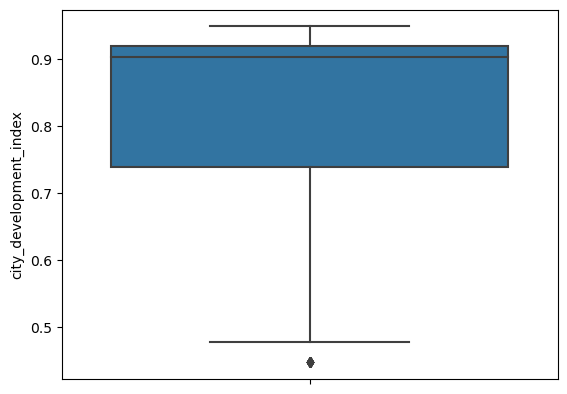

In [14]:
# Boxplot de city development index discriminando por target
sns.boxplot(y='city_development_index', data=df)
plt.show()

**Conclusiones**
1. Se observa un aumento en los candidatos que desean cambiar de trabajo en las ciudades con un city_development_index de 60% aproximadamente y se evidencia un comportamiento inverso en las ciudades con un city_development_index de 90% aproximadamente.
2. No contiene una cantidad significativa de valores outliers

<a id="36"></a>
### 3.6. Análisis de variable Education Level

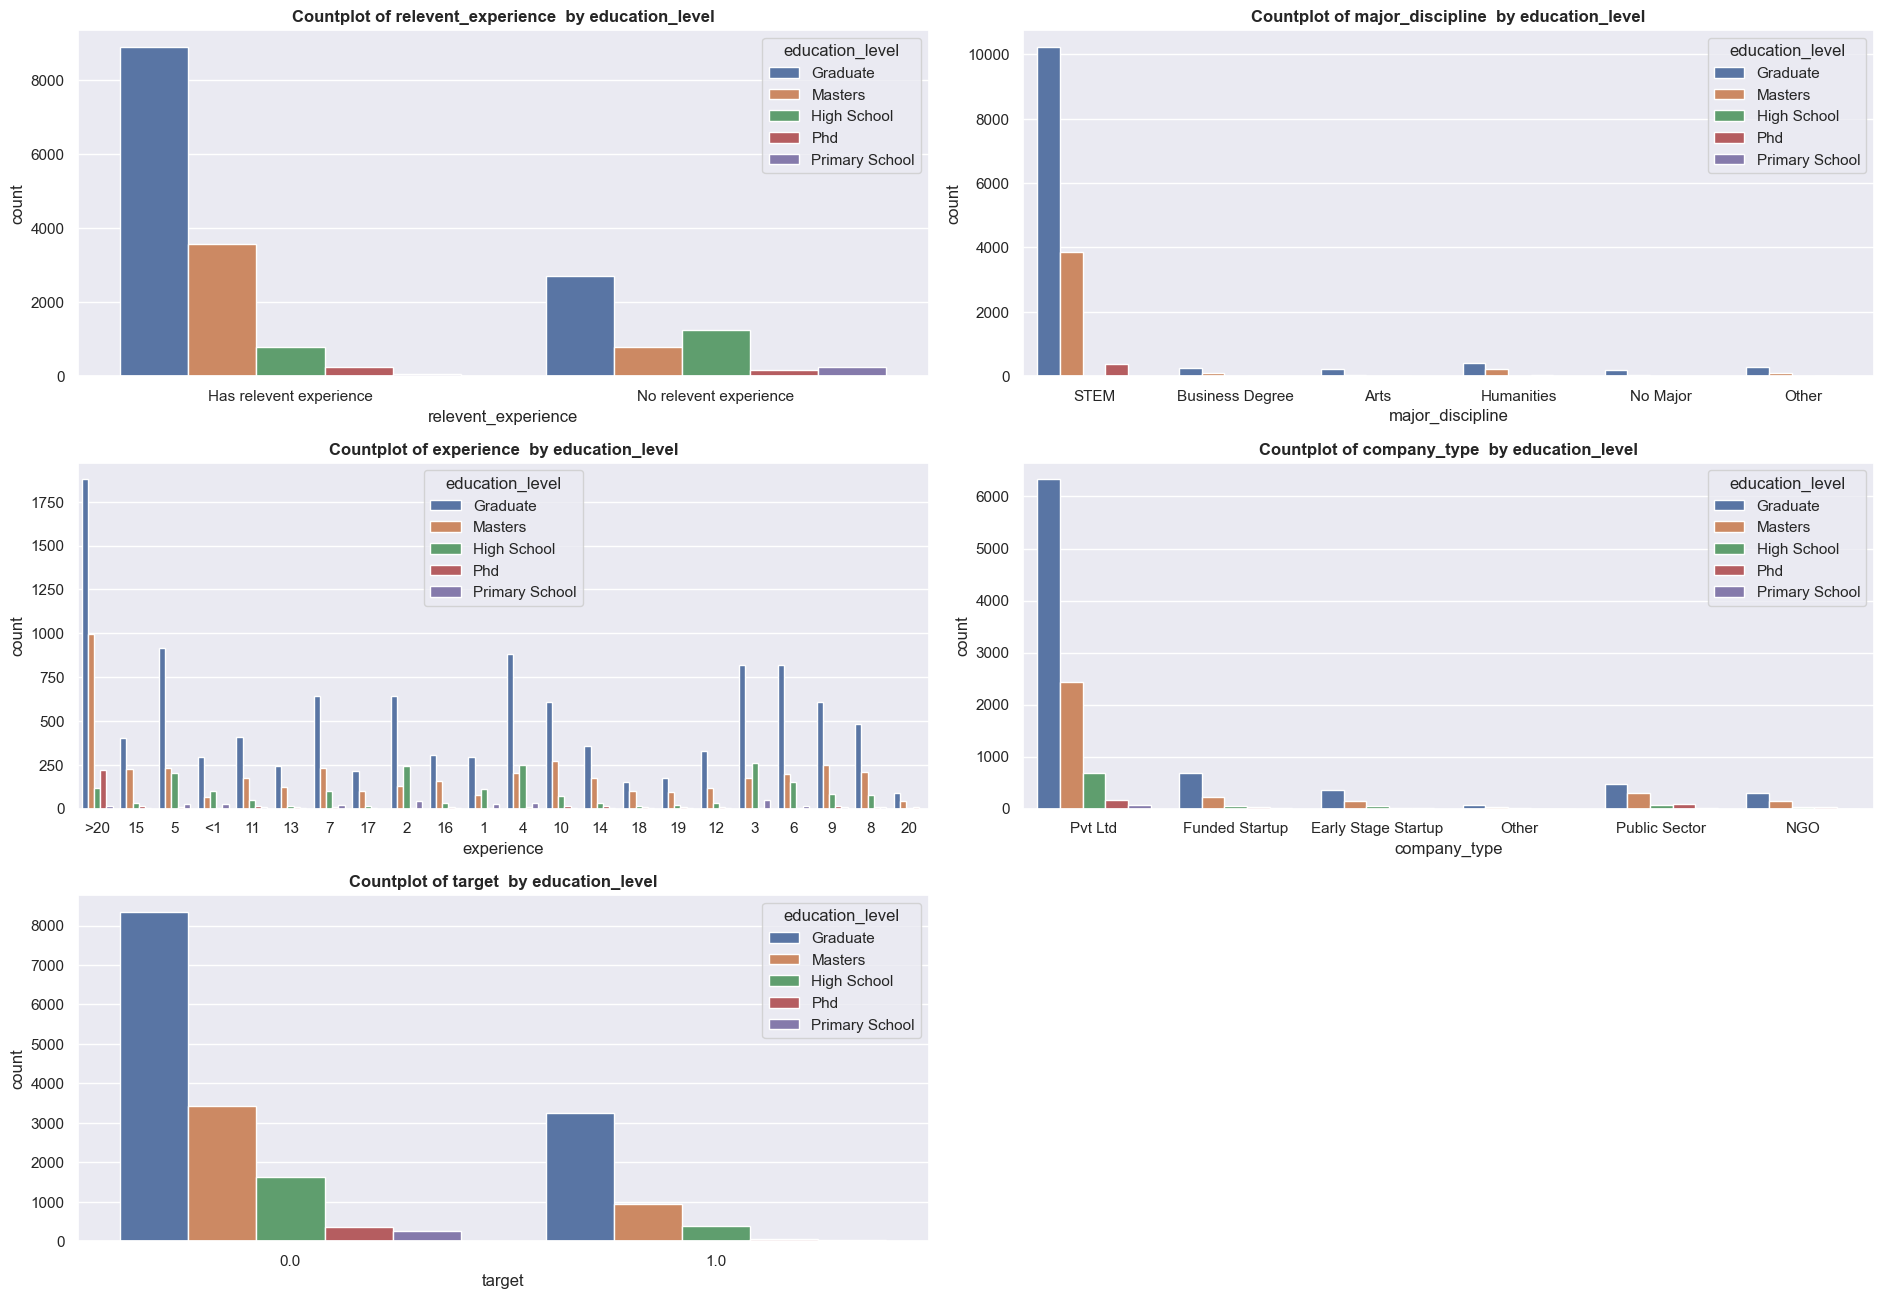

In [15]:
#Countplots showing the frequency of each category with respect to education level 
plt.figure(figsize=[19,17])
sns.set_theme(style="darkgrid")
plot=["relevent_experience","major_discipline", "experience","company_type","target"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='education_level', data=df)
    plt.title("Countplot of {}  by education_level".format(f),weight="bold")
    n=n+1
plt.tight_layout()
plt.show()

**Conclusiones**
1. No se observa ningun candidato que desee cambiar de trabajo con education_level igual a phd o primary school
2. Se observa una proporcion mayor de graduate en pvt ltd que en las otras company_type
3. Hay una mayor cantidad de candidatos con education level igual a graduate

<a id="37"></a>
### 3.7. Análisis de variable Company Type y Company Size

<AxesSubplot:xlabel='company_size', ylabel='count'>

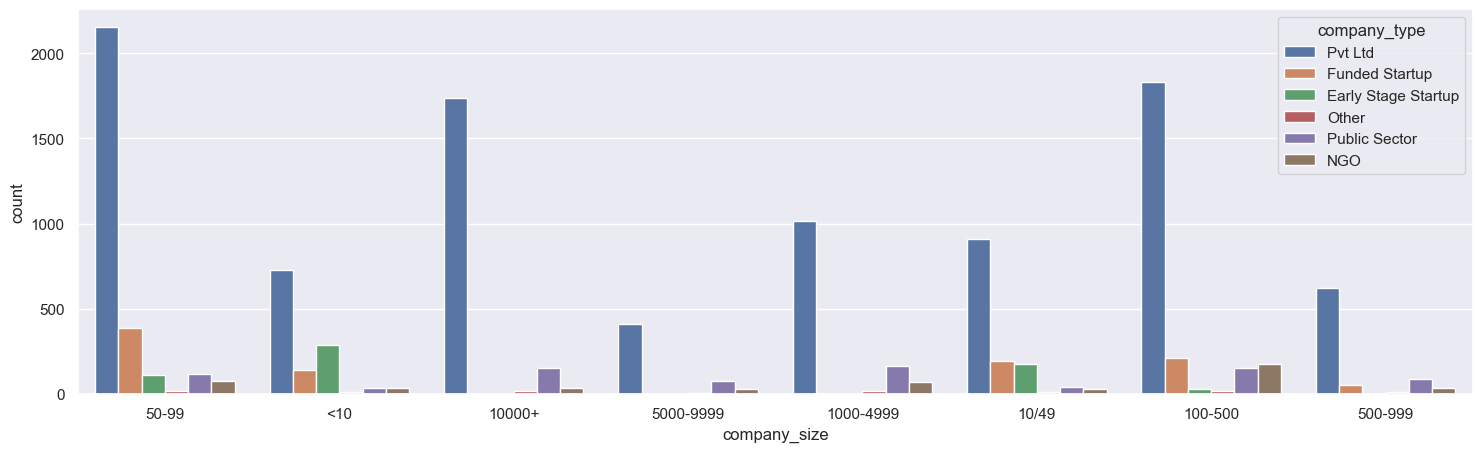

In [16]:
# Experience vs change of job
plt.figure(figsize=(18,5))
sns.countplot(x=df["company_size"], hue=df["company_type"] ) 

<a id="38"></a>
### 3.8. Análisis de variable Training hours

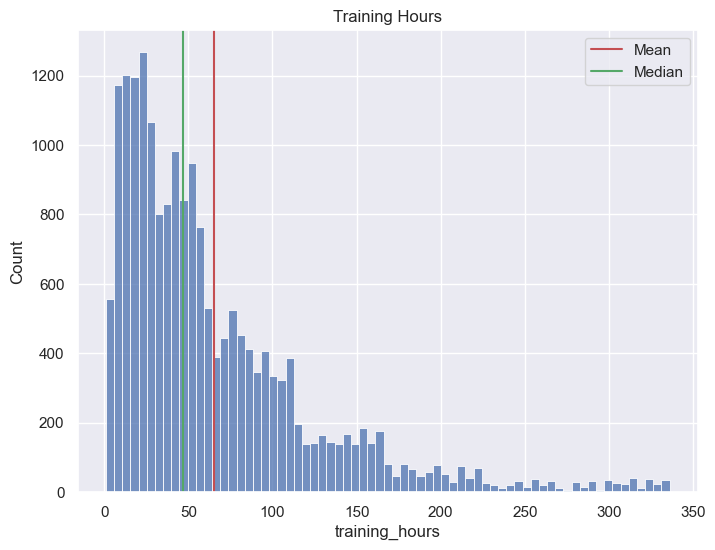

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(df["training_hours"])
plt.title("Training Hours")
plt.axvline(df["training_hours"].mean(), c="r", label="Mean")
plt.axvline(df["training_hours"].median(), c="g", label="Median")
plt.legend();

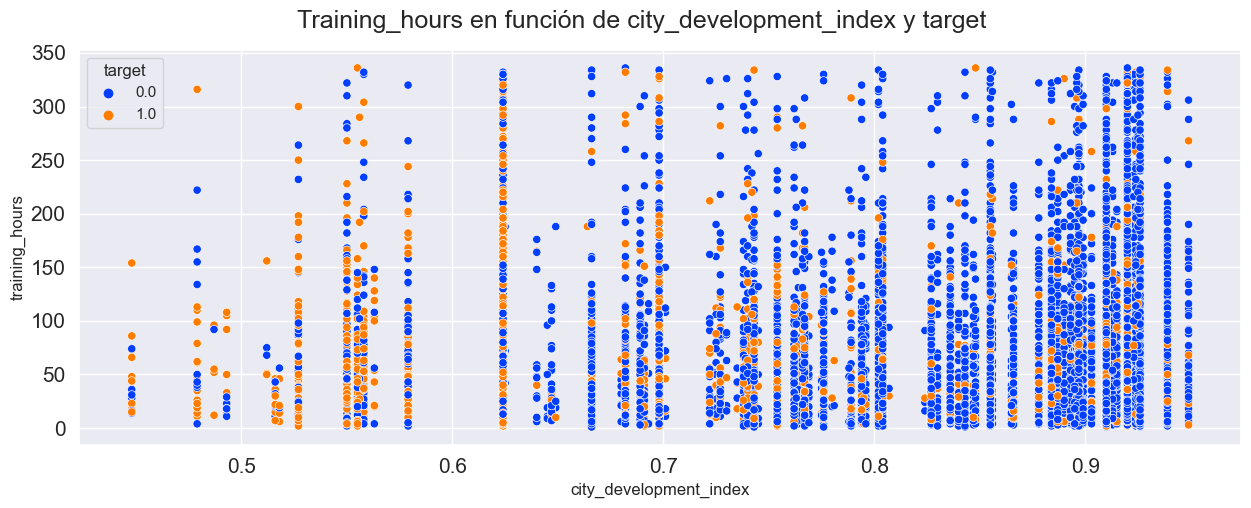

In [18]:
f, ax = plt.subplots(figsize=(15, 5))
ax.tick_params(labelsize=15)
sns.scatterplot(data=df, x="city_development_index", y="training_hours", hue="target", sizes=(50, 500), palette="bright")
f.subplots_adjust(top=0.9)
f.suptitle('Training_hours en función de city_development_index y target', fontsize="18");

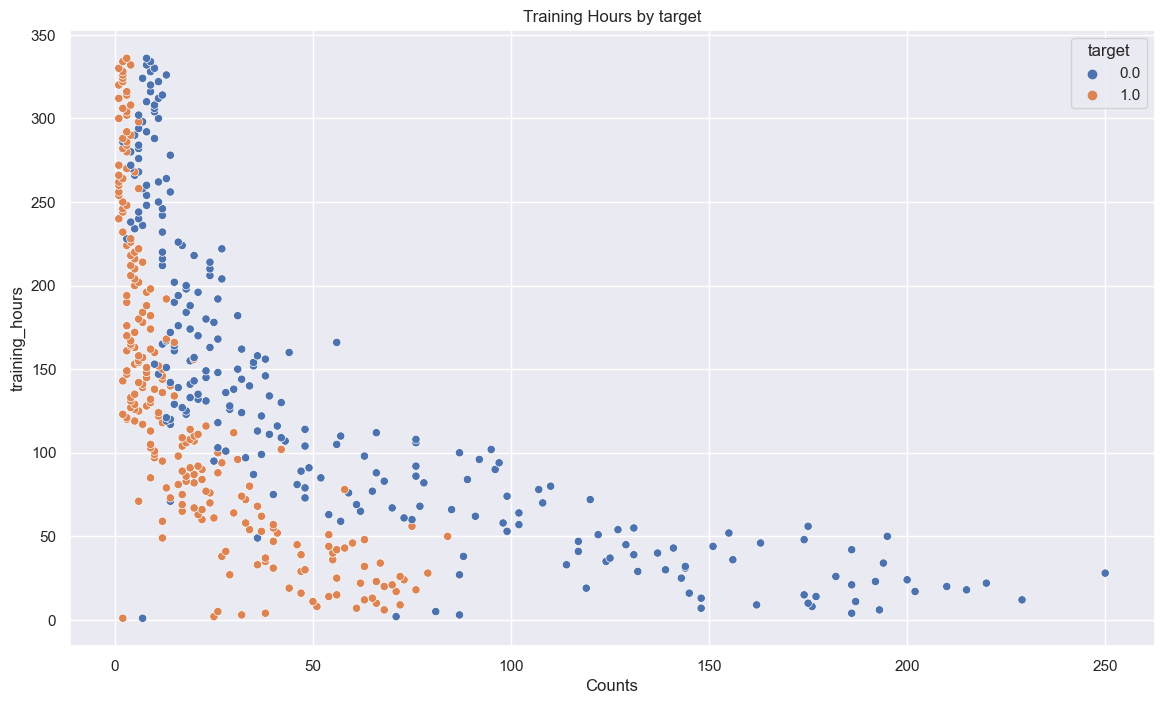

In [19]:

# Does training_hours has influence to change a job?

a = pd.DataFrame(df.groupby(['training_hours','target']).count()['enrollee_id'])
a.rename(columns= {'enrollee_id': "Counts"}, inplace=True)
a.reset_index(inplace=True)

plt.figure(figsize=(14, 8))
sns.scatterplot(a.Counts,a.training_hours, hue='target', data=a)
plt.title("Training Hours by target")
plt.show()